# Импортирование библиотек

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Чтение учебного датасета

In [4]:
df = pd.read_csv("S02-hw-dataset.csv")

In [5]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# Поиск пропусков по колонкам

In [8]:
for column in df.columns:
    if df[column].isna().mean()*100 != 0:
        print(f"Доля пропусков в колонке {column}: {df[column].isna().mean()*100:.2f}% ")
        print(df[df[column].isna()])

Доля пропусков в колонке age: 4.88% 
    user_id  age country  purchases  revenue
4         5  NaN      DE          6     1296
12       13  NaN      US          9      630


# Поиск полностью дублирующихся строк

In [9]:
print("Количество дубликатов:", df.duplicated().to_list().count(True))
print(df[df.duplicated()])

Количество дубликатов: 1
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


# Вывод подозрительных случаев

In [10]:
print("Аномальный возраст")
print(df[df["age"] > 100])
print(df[df["age"] < 18])

Аномальный возраст
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488


In [11]:
print("Аномальное количество покупок")
print(df[df["purchases"] < 0])

Аномальное количество покупок
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [12]:
print("Аномальное количество дохода при ненулевых количествах")
print(df[(df["revenue"] <= 0) & (df["purchases"] != 0)])

Аномальное количество дохода при ненулевых количествах
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


# Обнаруженные проблемы качества данных
При анализе были обнаружены следующие проблемы качества данных:   
Нет значения age (NaN) у user_id=5, user_id=13 (проблема полноты). Присутствует дублирующаяся строка по user_id=10 (нарушение уникальности). Возраст 120 у user_id 6 (проблема валидности). Age=5 у user_id=21 (проблема валидности и, возможно, проблема точности). Для user_id=5 purchases=-1 (проблема валидности). Для user_id 11 при purchases=4 revenue=0 (проблема валидности).

# Подсчет частот для категориальных переменных.

In [13]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

# Группировка с агрегатами.

In [14]:
print(df.groupby('country')[['revenue','purchases','age']].agg(['mean','sum']))

             revenue        purchases            age       
                mean    sum      mean sum       mean    sum
country                                                    
CN       1054.000000   2108  4.500000   9  24.000000   48.0
DE       1445.500000   8673  6.500000  39  34.600000  173.0
FR        675.916667   8111  4.250000  51  46.250000  555.0
RU        790.076923  10271  4.769231  62  30.076923  391.0
US        557.375000   4459  4.625000  37  36.714286  257.0


# Ввод дополнительных интервалов выручки.

In [15]:
df['revenue_groups'] = pd.cut(df['revenue'], 3, labels=['Low','Medium','High'], include_lowest=True)
print(df)

    user_id    age country  purchases  revenue revenue_groups
0         1   25.0      FR          7      749            Low
1         2   24.0      RU          5     1115         Medium
2         3   52.0      FR          7      399            Low
3         4   31.0      RU          6      654            Low
4         5    NaN      DE          6     1296         Medium
5         6  120.0      FR         -1      785            Low
6         7   46.0      RU          0        0            Low
7         8   28.0      CN          2      456            Low
8         9   39.0      US          4      980         Medium
9        10   24.0      RU          7      511            Low
10       11   24.0      US          4        0            Low
11       12   20.0      CN          7     1652           High
12       13    NaN      US          9      630            Low
13       14   36.0      DE          9     2358           High
14       15   57.0      FR          7      693            Low
15      

# Основные наблюдения
При базовом EDA было обнаружено, что для признака "country" доминирующей категорией является RU с 13 значениями. Наибольший средний возраст пользователя 46 с "country" "FR" (Франция). Среднее число покупок для пользователей всех стран примерно одинаково за исключением пользователей из Германии (6.5). Среднее значение выручки у пользователей из Германии также самое крупное. Несмотря на недостатки в данных, неожиданных эффектов не обнаружено.

# Визуализация данных в Matplotlib

In [16]:
import matplotlib.pyplot as plt

In [17]:
np.random.seed(446688)

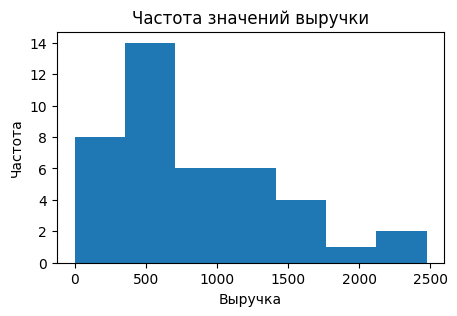

In [18]:
fig, ax = plt.subplots(figsize=(5,3))
ax.hist(df["revenue"],bins='auto')
ax.set_title('Частота значений выручки')
ax.set_ylabel('Частота')
ax.set_xlabel('Выручка')
plt.show()
# Можно наглядно увидеть частоту значений выручки

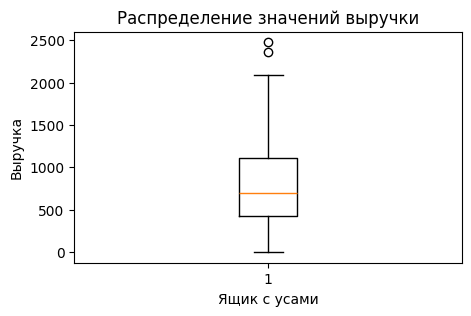

In [19]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(df["revenue"])
ax.set_title('Распределение значений выручки')
ax.set_ylabel('Выручка')
ax.set_xlabel('Ящик с усами')
plt.show()
# Можно наглядно увидеть выбросы

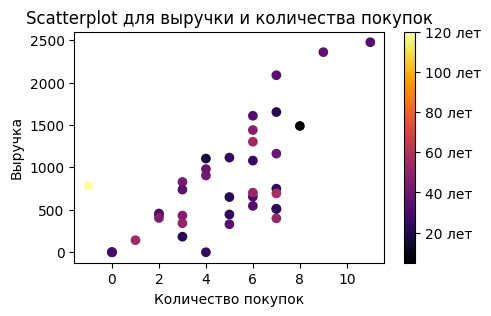

In [27]:
fig, ax = plt.subplots(figsize=(5,3))
s = ax.scatter(df["purchases"],df["revenue"],c=df["age"],cmap='inferno')
plt.colorbar(s, ax=ax, format='%d лет')
ax.set_title('Scatterplot для выручки и количества покупок')
ax.set_ylabel('Выручка')
ax.set_xlabel('Количество покупок')
plt.savefig("figures/scatter.pdf",bbox_inches='tight') # Сохранение графика
plt.show()
# Можно наглядно увидеть выбросы и зависимость выручки от количества покупок